In [1]:
import pandas as pd

# Load the provided CSV file
file_path = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_REFACTORED_CHATGPT_SEP_4.csv'
data = pd.read_csv(file_path)

# Step 1: Calculate Technical Indicators

# Moving Averages (SMA and EMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Relative Strength Index (RSI)
window_length = 14
close = data['Close']
delta = close.diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
data['Bollinger_Mid'] = data['Close'].rolling(window=20).mean()
data['Bollinger_Upper'] = data['Bollinger_Mid'] + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Lower'] = data['Bollinger_Mid'] - (data['Close'].rolling(window=20).std() * 2)

# Average True Range (ATR)
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = (data['High'] - data['Close'].shift(1)).abs()
data['Low-Close'] = (data['Low'] - data['Close'].shift(1)).abs()
data['True_Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['True_Range'].rolling(window=14).mean()

# Step 2: Drop intermediate columns used for calculations but not needed in final data
data.drop(columns=['High-Low', 'High-Close', 'Low-Close', 'True_Range'], inplace=True)

# Step 3: Save the output to a new CSV file
output_path = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_TECHNICAL_INDICATORS.csv'
data.to_csv(output_path, index=False)

print(f"Data with technical indicators has been saved to: {output_path}")


Data with technical indicators has been saved to: /Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_TECHNICAL_INDICATORS.csv


In [2]:
#Graphs


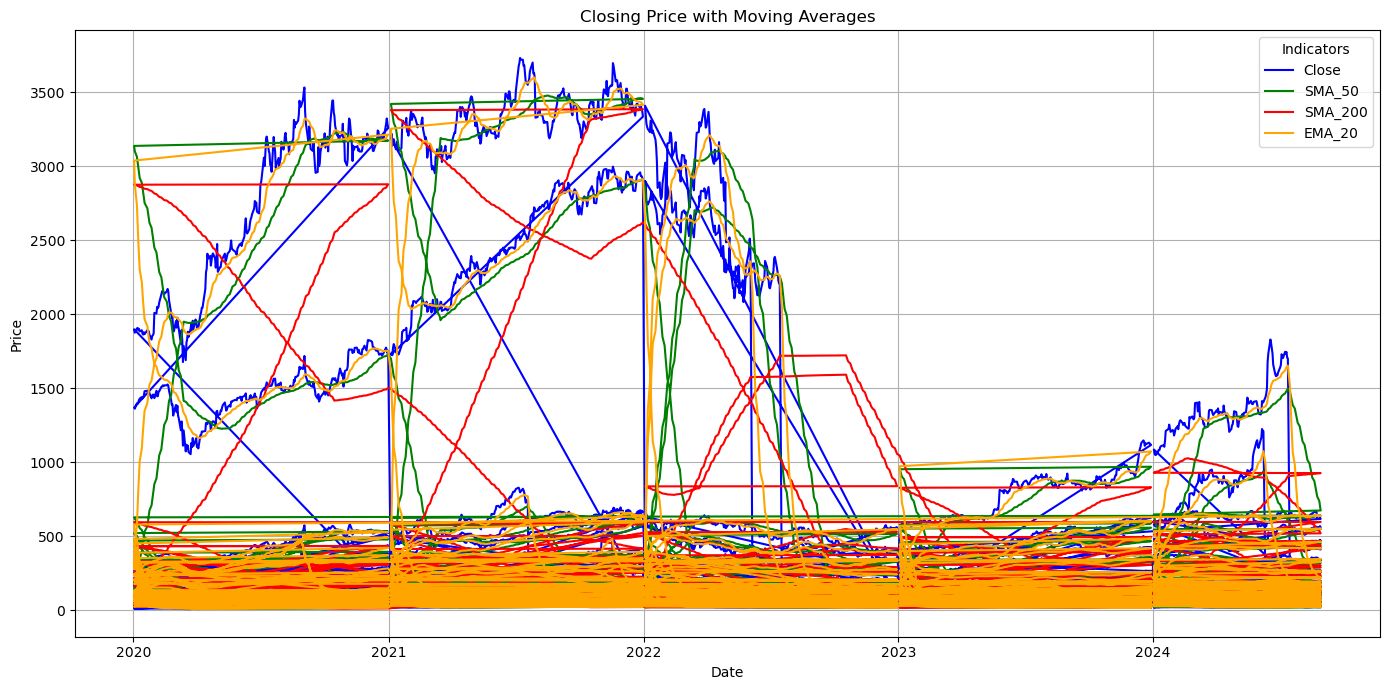

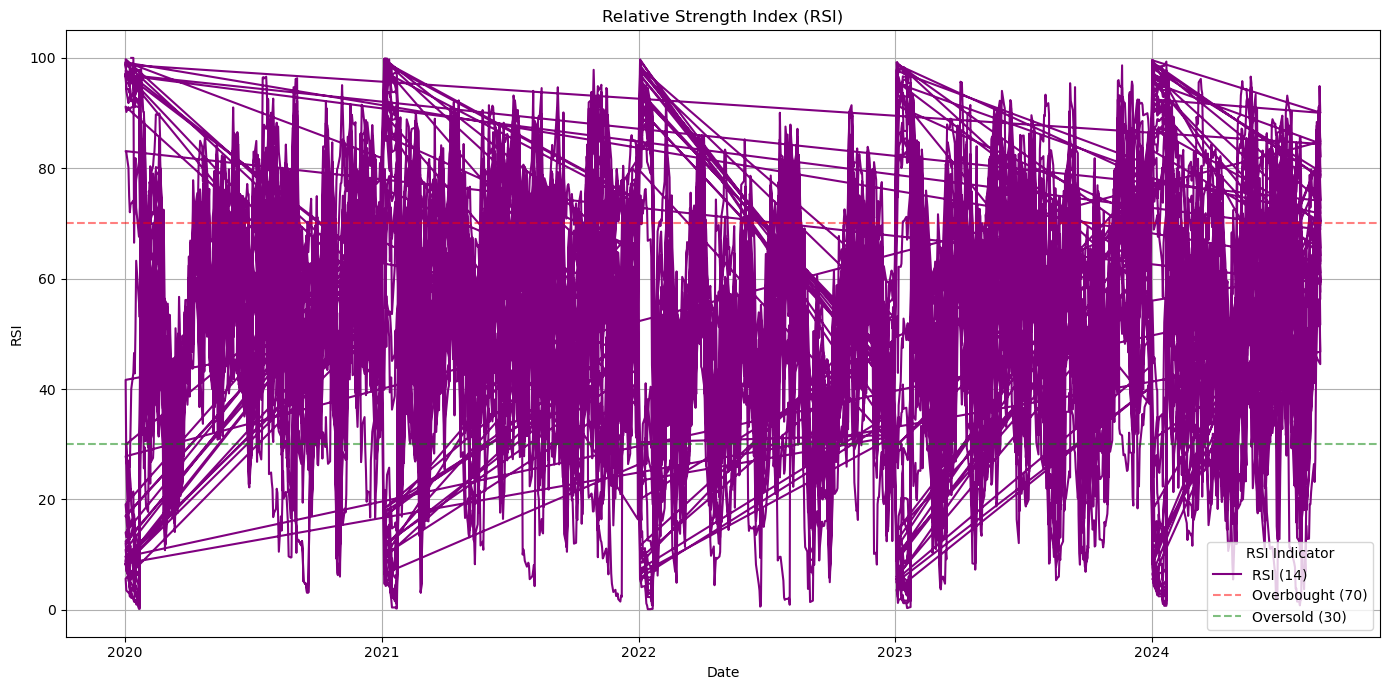

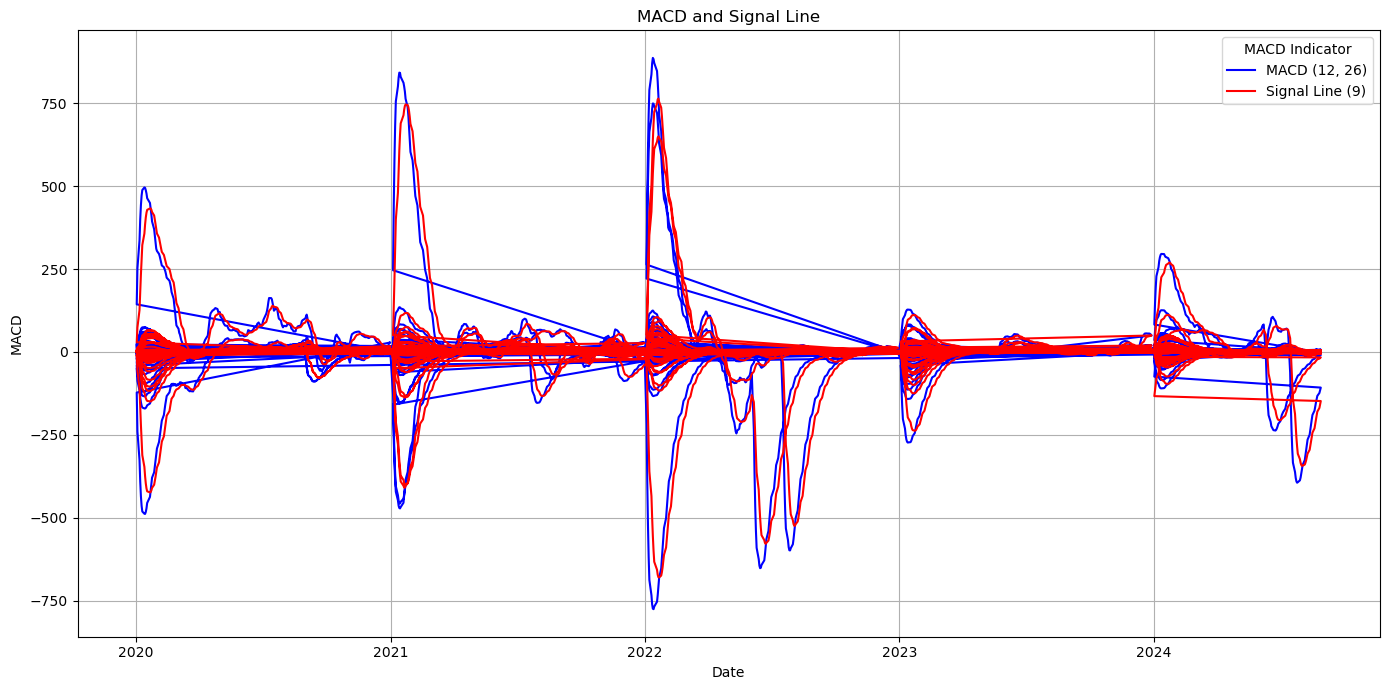

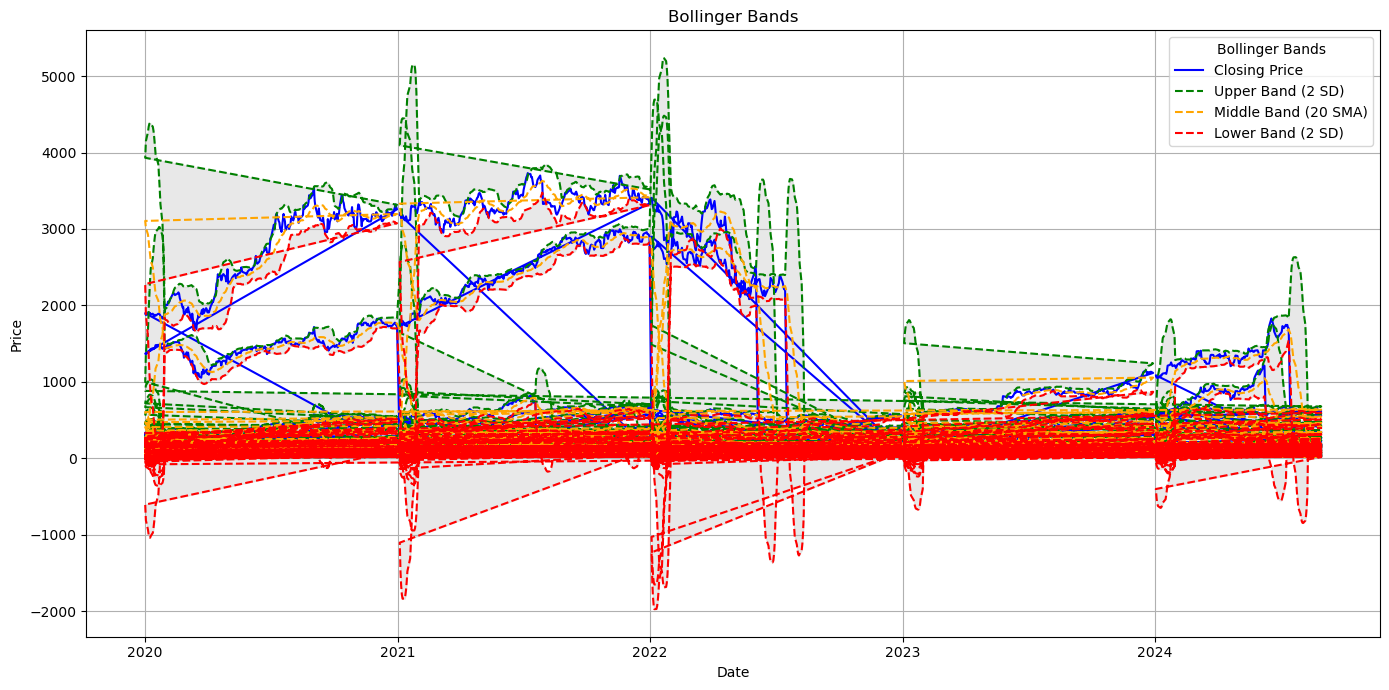

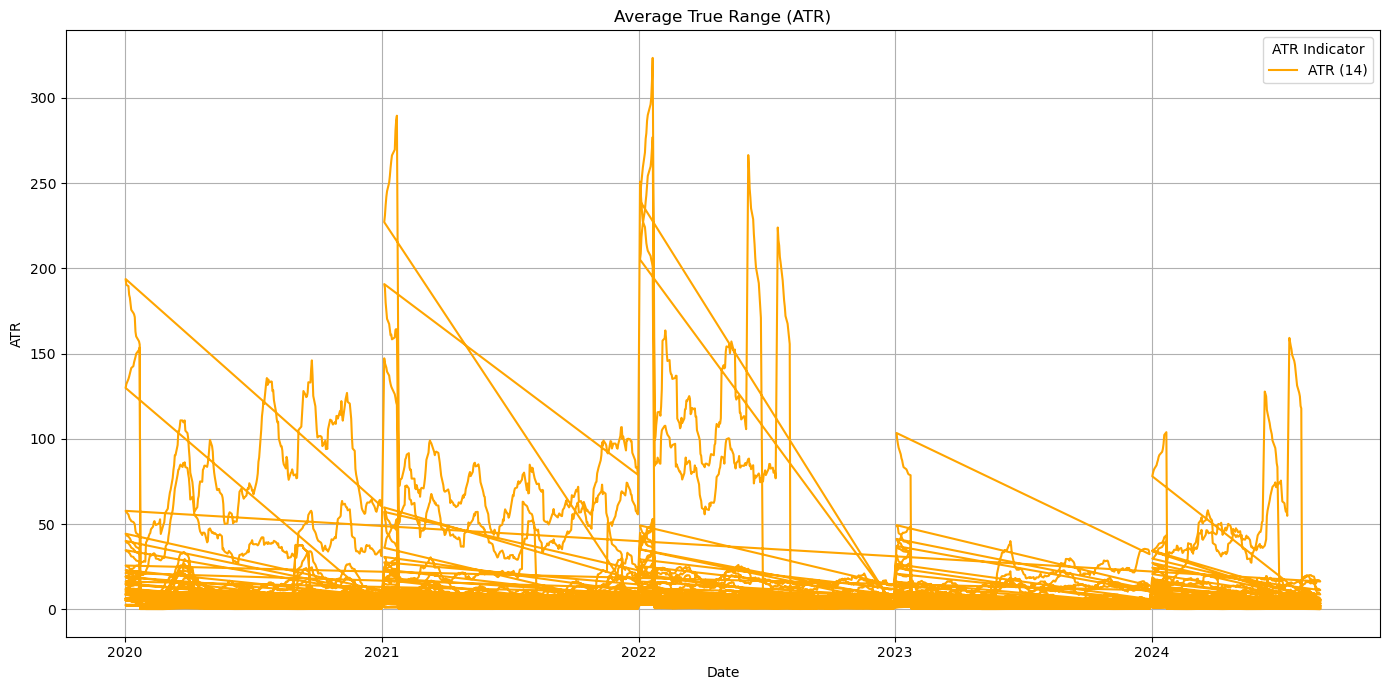

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_REFACTORED_CHATGPT_SEP_4.csv'  # Update this path as needed
data = pd.read_csv(file_path)

# Combine 'Year', 'Month', and 'Day' into a 'Date' column
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Set the 'Date' as the index for better plotting
data.set_index('Date', inplace=True)

# Ensure 'Close' column exists for the calculations below
if 'Close' not in data.columns:
    raise KeyError("The 'Close' column is required for technical indicators.")

# Step 1: Calculate Technical Indicators (if not already present)

# Moving Averages (SMA and EMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Relative Strength Index (RSI)
window_length = 14
close = data['Close']
delta = close.diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
data['Bollinger_Mid'] = data['Close'].rolling(window=20).mean()
data['Bollinger_Upper'] = data['Bollinger_Mid'] + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Lower'] = data['Bollinger_Mid'] - (data['Close'].rolling(window=20).std() * 2)

# Average True Range (ATR)
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = (data['High'] - data['Close'].shift(1)).abs()
data['Low-Close'] = (data['Low'] - data['Close'].shift(1)).abs()
data['True_Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['True_Range'].rolling(window=14).mean()

# Drop intermediate columns used for calculations but not needed in final data
data.drop(columns=['High-Low', 'High-Close', 'Low-Close', 'True_Range'], inplace=True)

# Step 2: Plot Technical Indicators

# Function to plot the closing price along with a technical indicator
def plot_with_indicator(title, data, y_label, columns_to_plot, colors, file_name):
    plt.figure(figsize=(14, 7))
    for col, color in zip(columns_to_plot, colors):
        plt.plot(data.index, data[col], label=col, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend(loc='best', title='Indicators')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()

# Plot 1: Closing Price with Moving Averages (SMA 50, SMA 200, EMA 20)
plot_with_indicator(
    title='Closing Price with Moving Averages',
    data=data,
    y_label='Price',
    columns_to_plot=['Close', 'SMA_50', 'SMA_200', 'EMA_20'],
    colors=['blue', 'green', 'red', 'orange'],
    file_name='closing_price_with_moving_averages.png'
)

# Plot 2: RSI
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')  # Overbought line
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')  # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best', title='RSI Indicator')
plt.grid(True)
plt.tight_layout()
plt.savefig('rsi_plot.png')
plt.show()

# Plot 3: MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['MACD'], label='MACD (12, 26)', color='blue')
plt.plot(data.index, data['Signal_Line'], label='Signal Line (9)', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend(loc='best', title='MACD Indicator')
plt.grid(True)
plt.tight_layout()
plt.savefig('macd_signal_line.png')
plt.show()

# Plot 4: Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['Bollinger_Upper'], label='Upper Band (2 SD)', linestyle='--', color='green')
plt.plot(data.index, data['Bollinger_Mid'], label='Middle Band (20 SMA)', linestyle='--', color='orange')
plt.plot(data.index, data['Bollinger_Lower'], label='Lower Band (2 SD)', linestyle='--', color='red')
plt.fill_between(data.index, data['Bollinger_Lower'], data['Bollinger_Upper'], color='lightgrey', alpha=0.5)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best', title='Bollinger Bands')
plt.grid(True)
plt.tight_layout()
plt.savefig('bollinger_bands.png')
plt.show()

# Plot 5: ATR (Average True Range)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ATR'], label='ATR (14)', color='orange')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend(loc='best', title='ATR Indicator')
plt.grid(True)
plt.tight_layout()
plt.savefig('atr_plot.png')
plt.show()


In [16]:
#Output Graphs

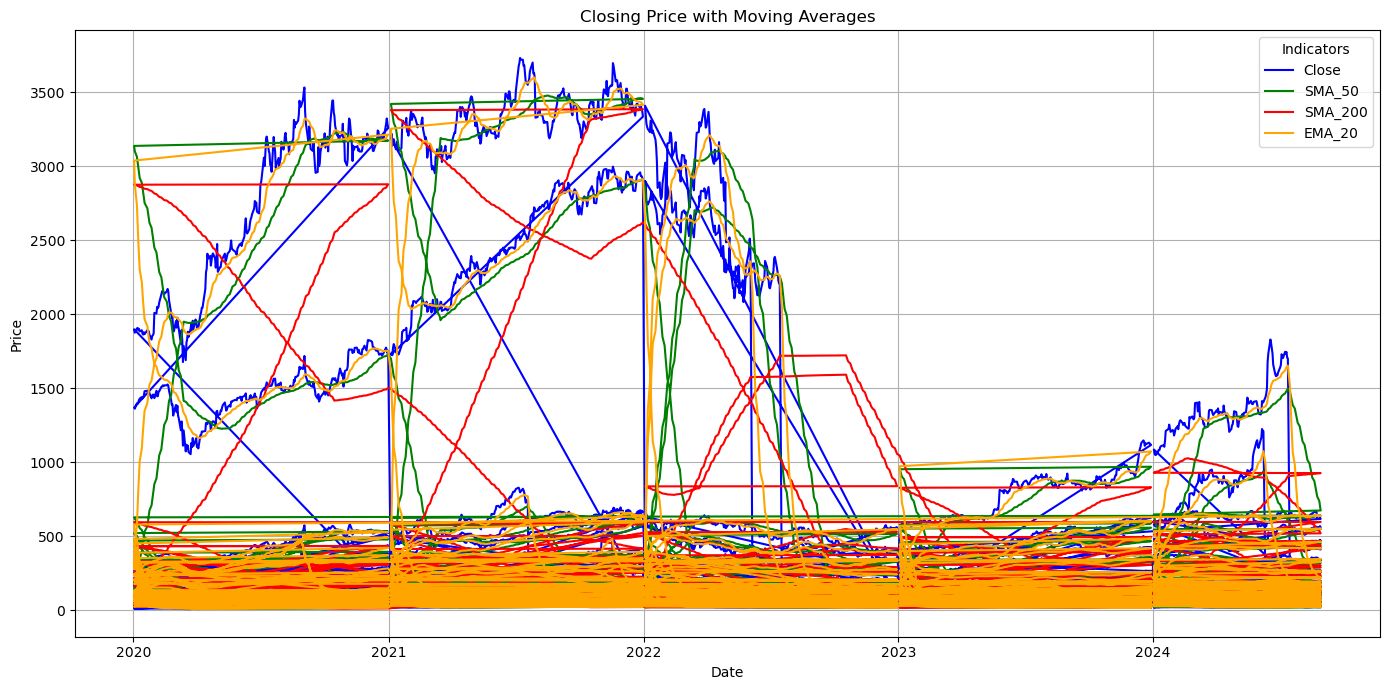

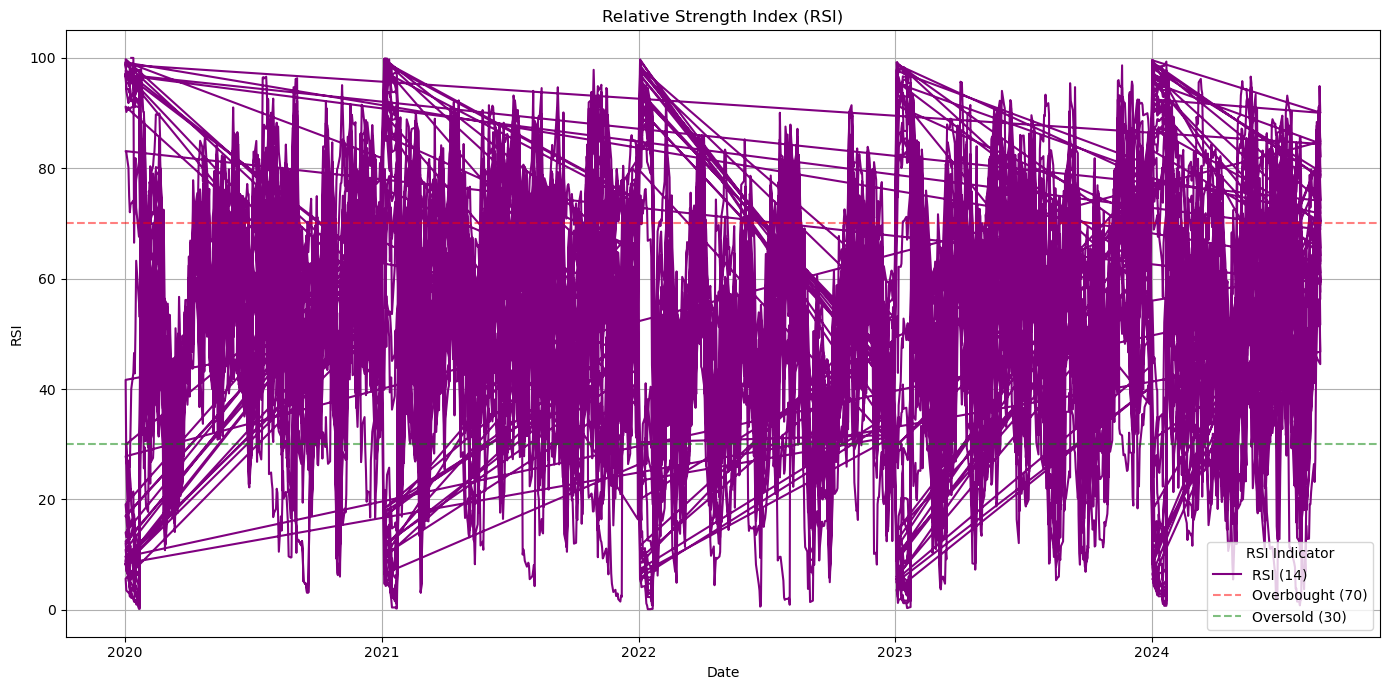

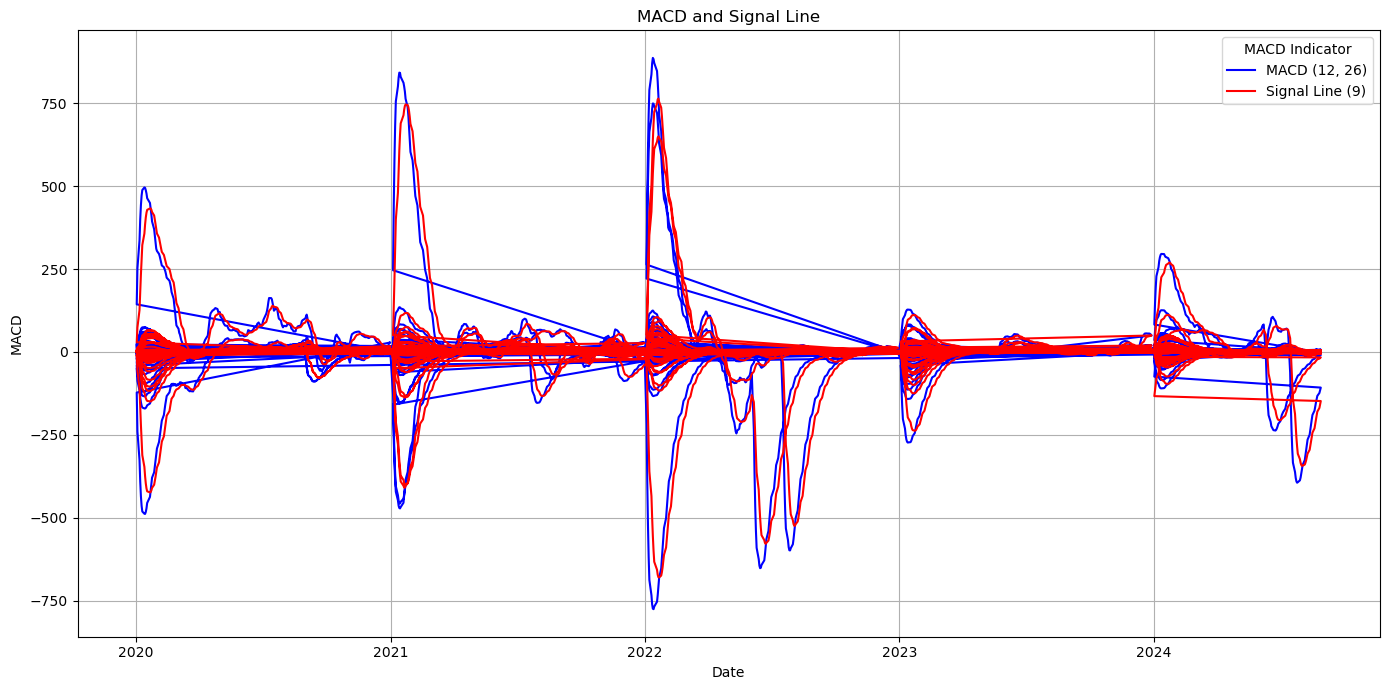

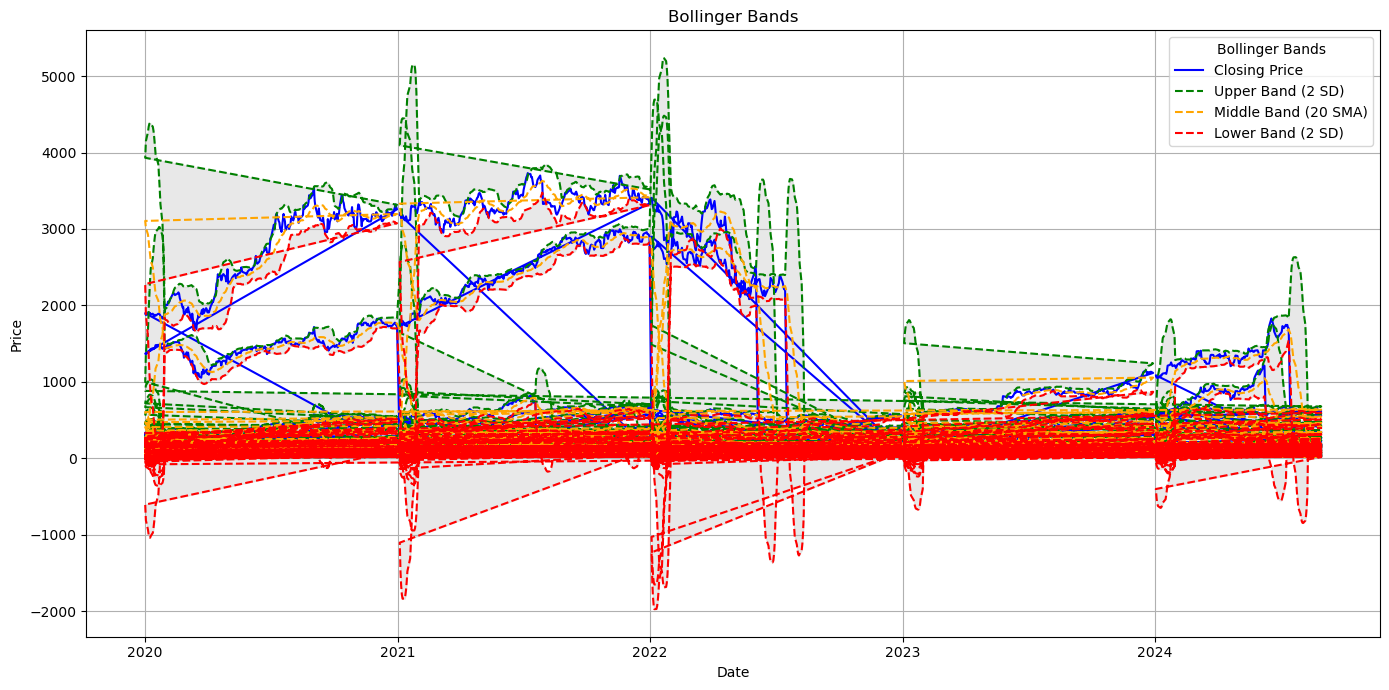

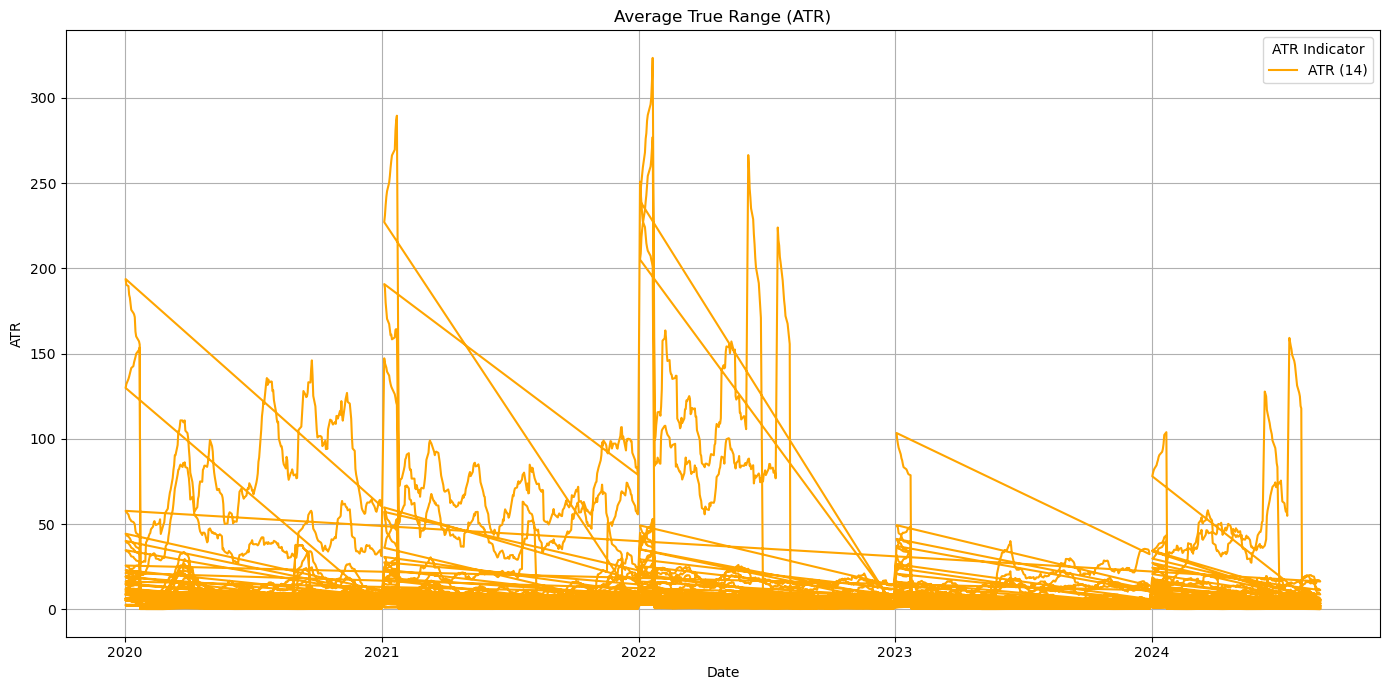

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/CSV/ALL_YEAR_DATA_REFACTORED_CHATGPT_SEP_4.csv'
data = pd.read_csv(file_path)

# Combine 'Year', 'Month', and 'Day' into a 'Date' column
data['Date'] = pd.to_datetime(data[['Year', 'Month', 'Day']])

# Set the 'Date' as the index for better plotting
data.set_index('Date', inplace=True)

# Ensure 'Close' column exists for the calculations below
if 'Close' not in data.columns:
    raise KeyError("The 'Close' column is required for technical indicators.")

# Step 1: Calculate Technical Indicators (if not already present)

# Moving Averages (SMA and EMA)
data['SMA_50'] = data['Close'].rolling(window=50).mean()  # 50-day Simple Moving Average
data['SMA_200'] = data['Close'].rolling(window=200).mean()  # 200-day Simple Moving Average
data['EMA_20'] = data['Close'].ewm(span=20, adjust=False).mean()  # 20-day Exponential Moving Average

# Relative Strength Index (RSI)
window_length = 14
close = data['Close']
delta = close.diff(1)
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=window_length, min_periods=1).mean()
avg_loss = loss.rolling(window=window_length, min_periods=1).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))

# Moving Average Convergence Divergence (MACD)
data['MACD'] = data['Close'].ewm(span=12, adjust=False).mean() - data['Close'].ewm(span=26, adjust=False).mean()
data['Signal_Line'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Bollinger Bands
data['Bollinger_Mid'] = data['Close'].rolling(window=20).mean()
data['Bollinger_Upper'] = data['Bollinger_Mid'] + (data['Close'].rolling(window=20).std() * 2)
data['Bollinger_Lower'] = data['Bollinger_Mid'] - (data['Close'].rolling(window=20).std() * 2)

# Average True Range (ATR)
data['High-Low'] = data['High'] - data['Low']
data['High-Close'] = (data['High'] - data['Close'].shift(1)).abs()
data['Low-Close'] = (data['Low'] - data['Close'].shift(1)).abs()
data['True_Range'] = data[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
data['ATR'] = data['True_Range'].rolling(window=14).mean()

# Drop intermediate columns used for calculations but not needed in final data
data.drop(columns=['High-Low', 'High-Close', 'Low-Close', 'True_Range'], inplace=True)

# Ensure the output directory exists
output_dir = '/Users/ronaldsheaks/Desktop/OSU AI Bootcamp/Group Project 2/GitHub Repo/Project_2_StockMrkt_ML/DATA_OUTPUTS/GRAPHS_CHARTS/TECHNICAL_INDICATORS'
os.makedirs(output_dir, exist_ok=True)

# Step 2: Plot Technical Indicators

# Function to plot the closing price along with a technical indicator
def plot_with_indicator(title, data, y_label, columns_to_plot, colors, file_name):
    plt.figure(figsize=(14, 7))
    for col, color in zip(columns_to_plot, colors):
        plt.plot(data.index, data[col], label=col, color=color)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel(y_label)
    plt.legend(loc='best', title='Indicators')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, file_name))
    plt.show()

# Plot 1: Closing Price with Moving Averages (SMA 50, SMA 200, EMA 20)
plot_with_indicator(
    title='Closing Price with Moving Averages',
    data=data,
    y_label='Price',
    columns_to_plot=['Close', 'SMA_50', 'SMA_200', 'EMA_20'],
    colors=['blue', 'green', 'red', 'orange'],
    file_name='closing_price_with_moving_averages.png'
)

# Plot 2: RSI
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['RSI'], label='RSI (14)', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red', label='Overbought (70)')  # Overbought line
plt.axhline(30, linestyle='--', alpha=0.5, color='green', label='Oversold (30)')  # Oversold line
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend(loc='best', title='RSI Indicator')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'rsi_plot.png'))
plt.show()

# Plot 3: MACD and Signal Line
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['MACD'], label='MACD (12, 26)', color='blue')
plt.plot(data.index, data['Signal_Line'], label='Signal Line (9)', color='red')
plt.title('MACD and Signal Line')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend(loc='best', title='MACD Indicator')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'macd_signal_line.png'))
plt.show()

# Plot 4: Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Closing Price', color='blue')
plt.plot(data.index, data['Bollinger_Upper'], label='Upper Band (2 SD)', linestyle='--', color='green')
plt.plot(data.index, data['Bollinger_Mid'], label='Middle Band (20 SMA)', linestyle='--', color='orange')
plt.plot(data.index, data['Bollinger_Lower'], label='Lower Band (2 SD)', linestyle='--', color='red')
plt.fill_between(data.index, data['Bollinger_Lower'], data['Bollinger_Upper'], color='lightgrey', alpha=0.5)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(loc='best', title='Bollinger Bands')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'bollinger_bands.png'))
plt.show()

# Plot 5: ATR (Average True Range)
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['ATR'], label='ATR (14)', color='orange')
plt.title('Average True Range (ATR)')
plt.xlabel('Date')
plt.ylabel('ATR')
plt.legend(loc='best', title='ATR Indicator')
plt.grid(True)
plt.tight_layout()
plt.savefig(os.path.join(output_dir, 'atr_plot.png'))
plt.show()
